In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.jaywalk_gym.jaywalk_env import JaywalkEnv, EnvParams
from src.agents.reinforce.reinforce_agent import REINFORCEAgent

In [3]:
easy_params = EnvParams(
    use_traffic_light=True,
    max_reward=100,
    wait_reward=-1,
    death_reward=-50,
)
easy_env = JaywalkEnv(easy_params)

In [4]:
medium_params = EnvParams(
    use_traffic_light=True,
    max_reward=100,
    wait_reward=-1,
    death_reward=-50,
    num_lane_groups=3,
    max_vehicles=30,
    p_vehicle_spawn=0.8,
    p_vehicle_stop=0.5,
)
medium_env = JaywalkEnv(medium_params)

In [5]:
hard_params = EnvParams(
    use_traffic_light=True,
    max_reward=100,
    wait_reward=-1,
    death_reward=-50,
    num_lane_groups=4,
    max_vehicles=50,
    p_vehicle_spawn=0.9,
    p_vehicle_stop=0.3,
)
hard_env = JaywalkEnv(hard_params)

In [6]:
import torch
import numpy as np
import pickle

torch.manual_seed(101)
np.random.seed(101)

for env_type, env in zip(["easy", "medium", "hard"], [easy_env, medium_env, hard_env]):
    train_parameters = {
        "state_dim": env.grid_shape[0] * env.grid_shape[1] + 3,
        "action_dim": 3,
        "action_space": [0, 1, 2],
        "hidden_dim": 64,
        "gamma": 0.99,
        "episodes": 250_000,
        "learning_rate": 3e-3,
        "timeout": 200,
        "device": "cpu",
    }

    agent = REINFORCEAgent(env, train_parameters)
    result = agent.train(train_parameters["episodes"])

    filename = (
            f"./checkpoints/final_reinforce/{env_type}"
        )
    agent.save(filename)

    with open(f"./checkpoints/final_reinforce/{env_type}_training_results.pkl", "wb") as f:
        pickle.dump(result, f)

Episode: 249999 | Return: 90.20 | Loss: -13322.01: 100%|██████████| 250000/250000 [09:12<00:00, 452.41it/s]


Model and optimizer states saved to ./checkpoints/final_reinforce/easy


Episode: 249999 | Return: -50.00 | Loss: 429.44: 100%|██████████| 250000/250000 [09:02<00:00, 460.97it/s]  


Model and optimizer states saved to ./checkpoints/final_reinforce/medium


Episode: 249999 | Return: 43.55 | Loss: -43533.34: 100%|██████████| 250000/250000 [24:48<00:00, 167.91it/s] 


Model and optimizer states saved to ./checkpoints/final_reinforce/hard


In [7]:
all_training_results = []

for env_type in ["easy", "medium", "hard"]:
    with open(f"./checkpoints/final_reinforce/{env_type}_training_results.pkl", "rb") as f:
        all_training_results.append(pickle.load(f))
        

In [25]:
for re in all_training_results:
    print(re.returns.shape)

(102644,)
(61637,)
(45556,)


(250000,)
(250000,)
(250000,)


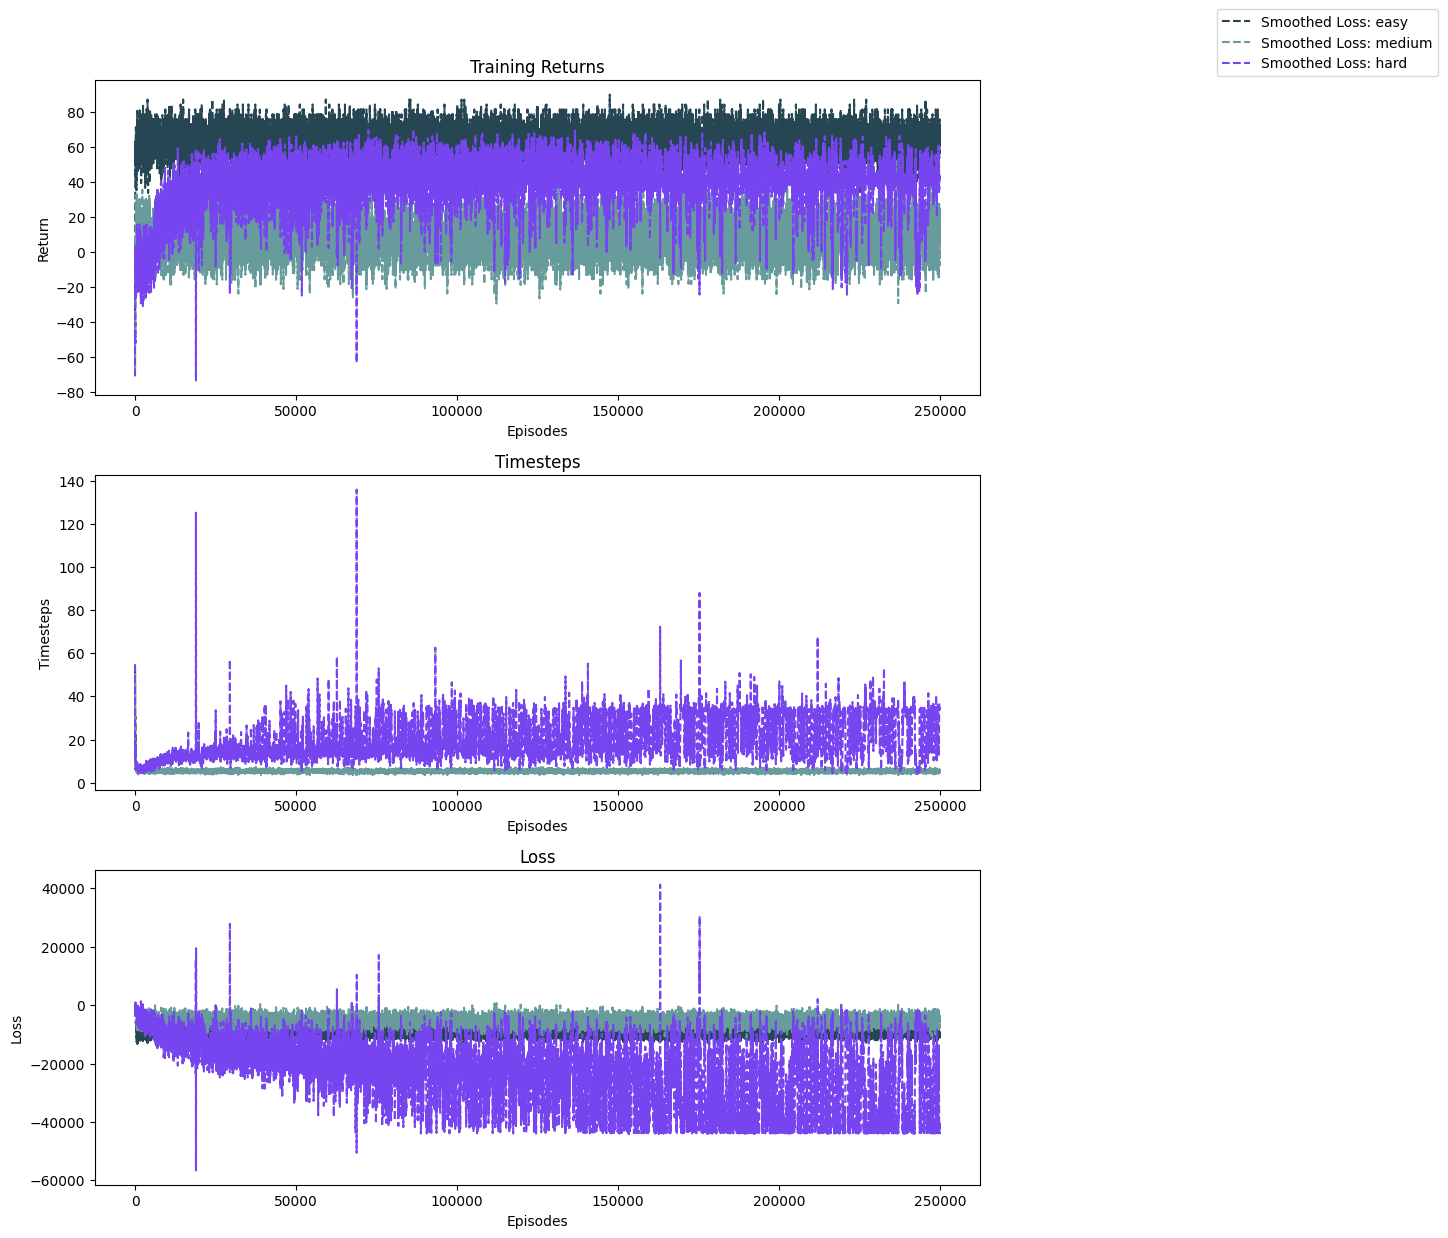

In [8]:
agent.plot_multiple_training_result(all_training_results, ["easy", "medium", "hard"])

In [9]:
agent.eval()

/Users/karenzhang/Documents/Northeastern/Fall24/RL/FinalProject/jaywalker-rl/src/jaywalk_gym/jaywalk_env.py:341: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


Video saved as policy_rollout.mp4!
